In [1]:
!pip install -U tensorflow==2.11 # Keras 2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 751.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.

In [4]:

!pip install git+https://github.com/sebastian-sz/efficientnet-lite-keras@main



  Cloning https://github.com/sebastian-sz/efficientnet-lite-keras (to revision main) to /tmp/pip-req-build-glutk41l
  Running command git clone --filter=blob:none --quiet https://github.com/sebastian-sz/efficientnet-lite-keras /tmp/pip-req-build-glutk41l
  Resolved https://github.com/sebastian-sz/efficientnet-lite-keras to commit 728def97857d8aa83535d9275a1834c7df2316e9
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-lite-keras: filename=efficientnet_lite_keras-1.0-py3-none-any.whl size=13106 sha256=9b26ea35c6ca7f2eb8987d22f0296105b076dea1e876c392d6cff595687c6b94
  Stored in directory: /tmp/pip-ephem-wheel-cache-i__72qkz/wheels/53/53/c3/2a1138ef96444cfd9bcab9c6a3e4edd56b4ce7e13b1923228c
Successfully built efficientnet-lite-keras

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
from glob import glob
import os
import pathlib
import tensorflow as tf
import keras
#import keras_tuner as kt
# Import package:
from efficientnet_lite import EfficientNetLiteB0
#models
#from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetLite

#preproces
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

from collections import Counter
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [6]:
tf.__version__, keras.__version__

('2.11.0', '2.11.0')

# Data Load

In [7]:
imgs = glob(r'/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/*/*')
labels = [el.split('/')[5] for el in imgs ]
SIZE = 220

# Visualisation

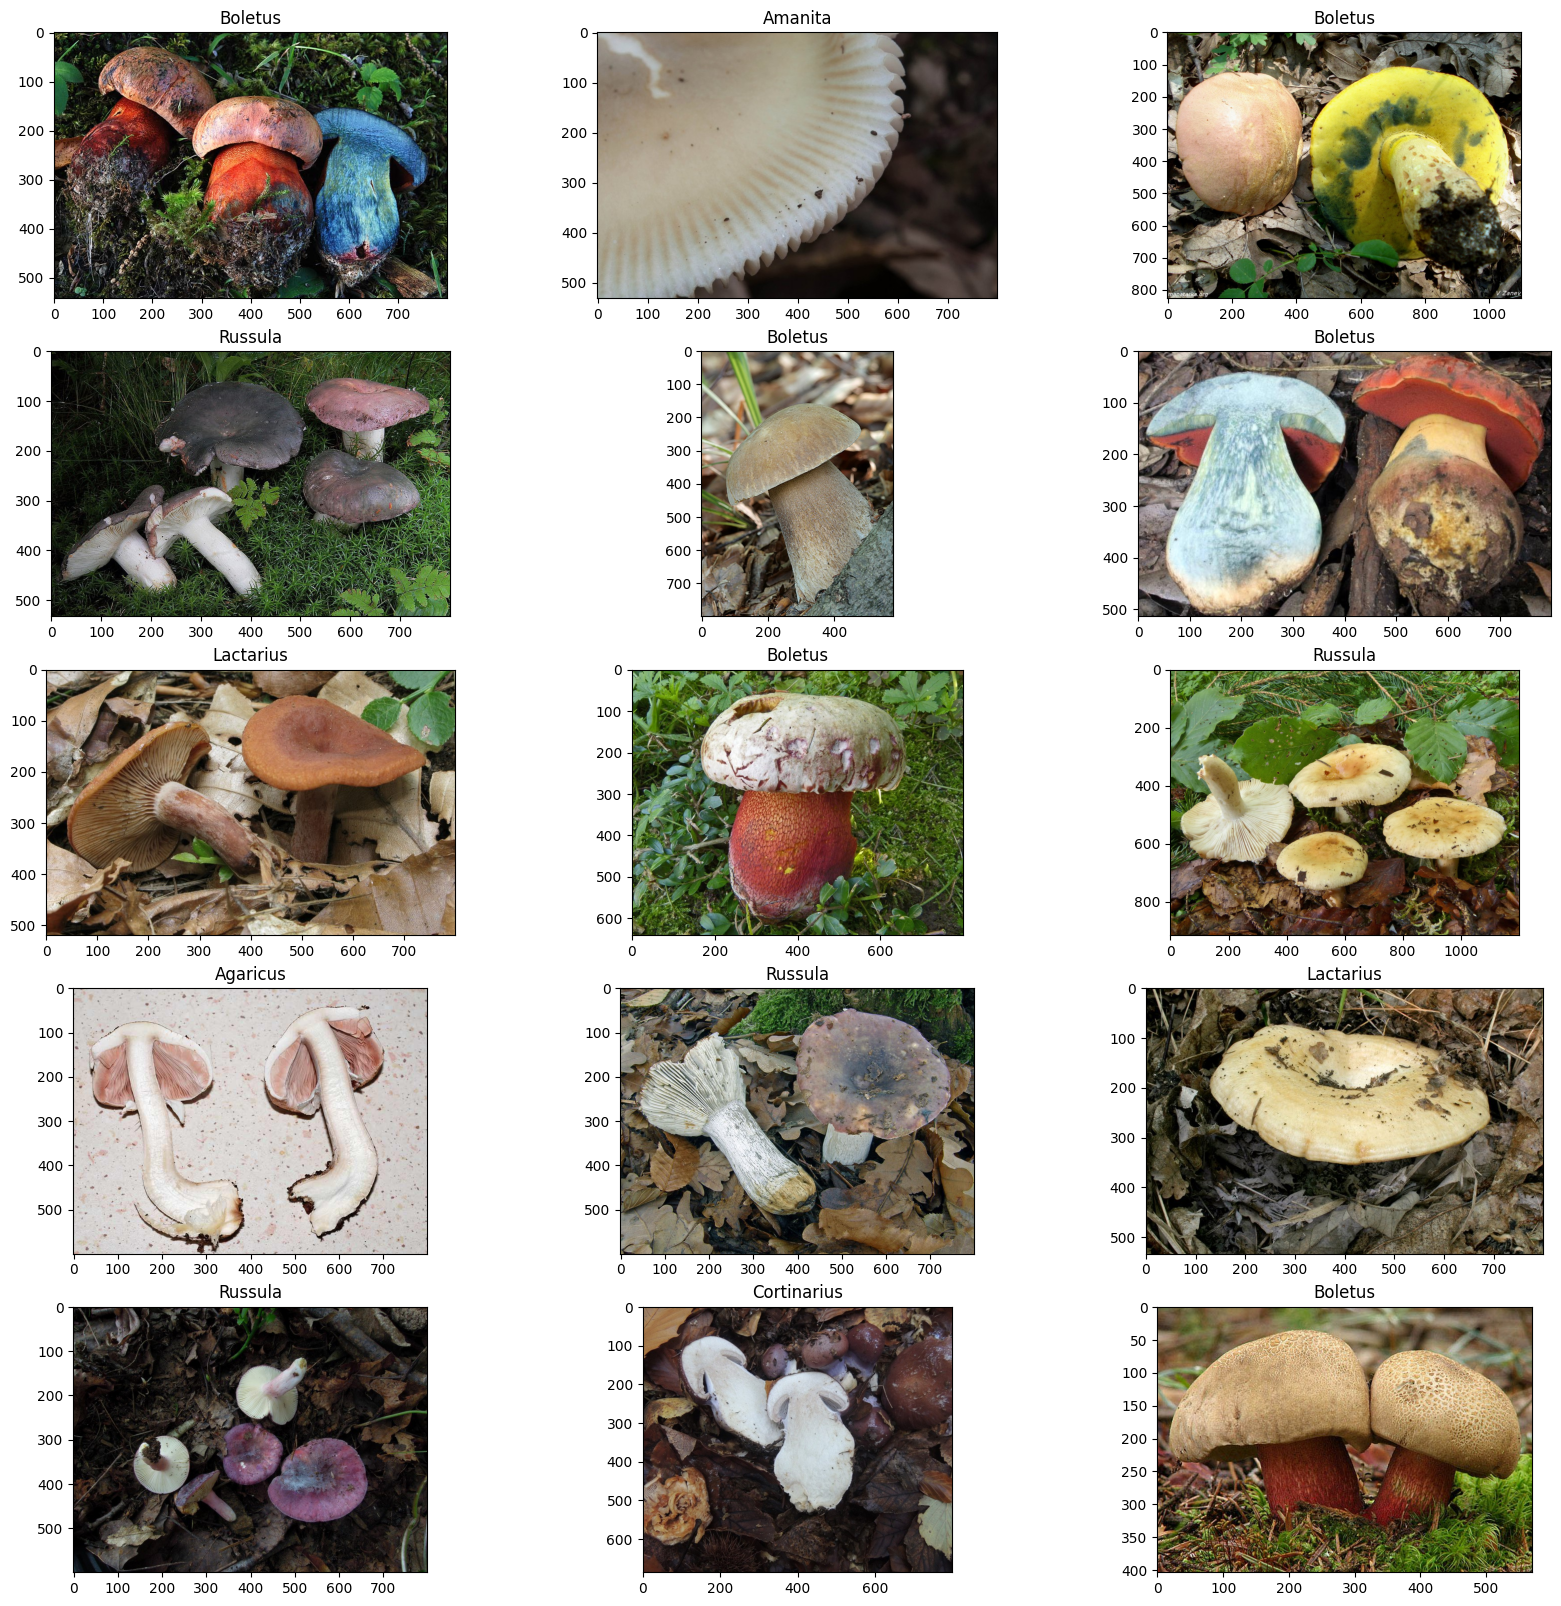

In [6]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
fig.subplots_adjust()
im_list = np.random.choice(imgs, 15)
for axi, im in zip( ax.flat, im_list):
    axi.set_title(im.split('/')[5],)
    axi.imshow(plt.imread(im), )


## Class Distribution

In [7]:
distribution_dict = {k:np.round(v*100/len(labels), 2) for k,v in Counter(labels).items()} 
distribution_dict

{'Entoloma': 5.42,
 'Suillus': 4.63,
 'Hygrocybe': 4.71,
 'Agaricus': 5.26,
 'Amanita': 11.17,
 'Lactarius': 23.28,
 'Russula': 17.1,
 'Boletus': 15.98,
 'Cortinarius': 12.45}

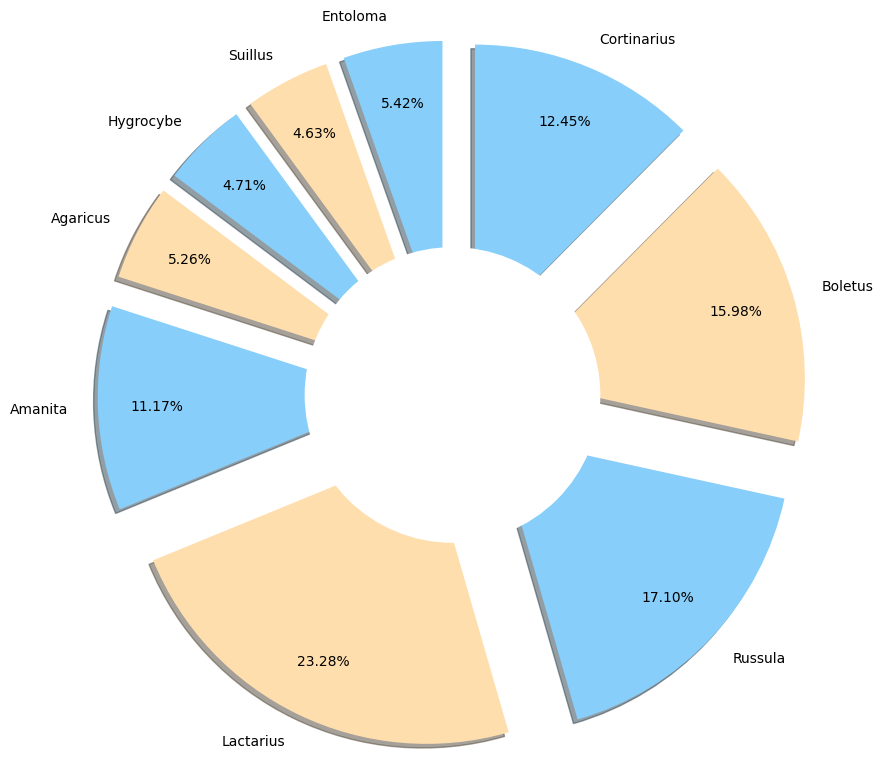

In [8]:
distribution_dict = {k:np.round(v*100/len(labels), 2) for k,v in Counter(labels).items()} 
tab = {'lightskyblue': '#87CEFA', 'navajowhite': '#FFDEAD'}

plt.pie.DonutSize=9
plt.pie(distribution_dict.values(), labels=distribution_dict.keys(),radius=2, colors=tab, shadow=True, startangle=90, autopct='%1.2f%%',
       pctdistance=0.80, explode=[0.4 for el in range(9)])

hole = plt.Circle((0, 0), 1.0, facecolor='white')
plt.gcf().gca().add_artist(hole)
 
plt.show()

## Test Train Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.33, random_state=14, stratify=labels)
train = pd.DataFrame(list(zip(X_train,y_train)), columns =['X','y'])
test = pd.DataFrame(list(zip(X_test,y_test)), columns =['X','y'])

In [10]:



datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True, 
        brightness_range=(1.0, 0.8),)
valid_gen = ImageDataGenerator(rescale=1./255)

In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
train_gen = datagen.flow_from_dataframe(train, x_col='X', y_col="y", target_size=(SIZE, SIZE), shuffle=True)
test_gen = valid_gen.flow_from_dataframe(test, x_col='X', y_col="y", target_size=(SIZE, SIZE))

Found 4498 validated image filenames belonging to 9 classes.
Found 2216 validated image filenames belonging to 9 classes.


## Build up EFB0 model

In [39]:
def build_model(num_classes=9):
    base_model = EfficientNetLiteB0(
        input_shape=(SIZE,SIZE, 3),
        include_top=False,
        pooling="avg",
        weights="imagenet"
    )

    base_model.trainable=True

    return tf.keras.Sequential([
        base_model,
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5), #0.6 0.7
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

In [43]:
model = build_model()

In [45]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
 
model.compile(loss=loss, metrics=['accuracy'], optimizer=optimizer)
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True, start_from_epoch=20)

In [53]:
epoch = 40
history = model.fit(train_gen, validation_data=test_gen, epochs=epoch, callbacks=[early_stop] )

Epoch 1/40
141/141 [==============================] - 142s 1s/step - loss: 0.7021 - accuracy: 0.7655 - val_loss: 0.9443 - val_accuracy: 0.7500
Epoch 2/40
141/141 [==============================] - 141s 998ms/step - loss: 0.6471 - accuracy: 0.7855 - val_loss: 0.8465 - val_accuracy: 0.7550
Epoch 3/40
141/141 [==============================] - 141s 1s/step - loss: 0.5740 - accuracy: 0.8112 - val_loss: 0.9354 - val_accuracy: 0.7369
Epoch 4/40
141/141 [==============================] - 143s 1s/step - loss: 0.5482 - accuracy: 0.8175 - val_loss: 1.0226 - val_accuracy: 0.7455
Epoch 5/40
141/141 [==============================] - 144s 1s/step - loss: 0.5072 - accuracy: 0.8270 - val_loss: 1.0212 - val_accuracy: 0.7405
Epoch 6/40
141/141 [==============================] - 144s 1s/step - loss: 0.5091 - accuracy: 0.8333 - val_loss: 1.1456 - val_accuracy: 0.7319
Epoch 7/40
141/141 [==============================] - 143s 1s/step - loss: 0.4470 - accuracy: 0.8490 - val_loss: 0.6920 - val_accuracy: 0.8

## Metrics

In [54]:
def show_history(history):
    plt.figure(figsize=(18,8))

    plt.suptitle('Loss and Accuracy Plots', fontsize=18)

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Number of epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Number of epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.show()

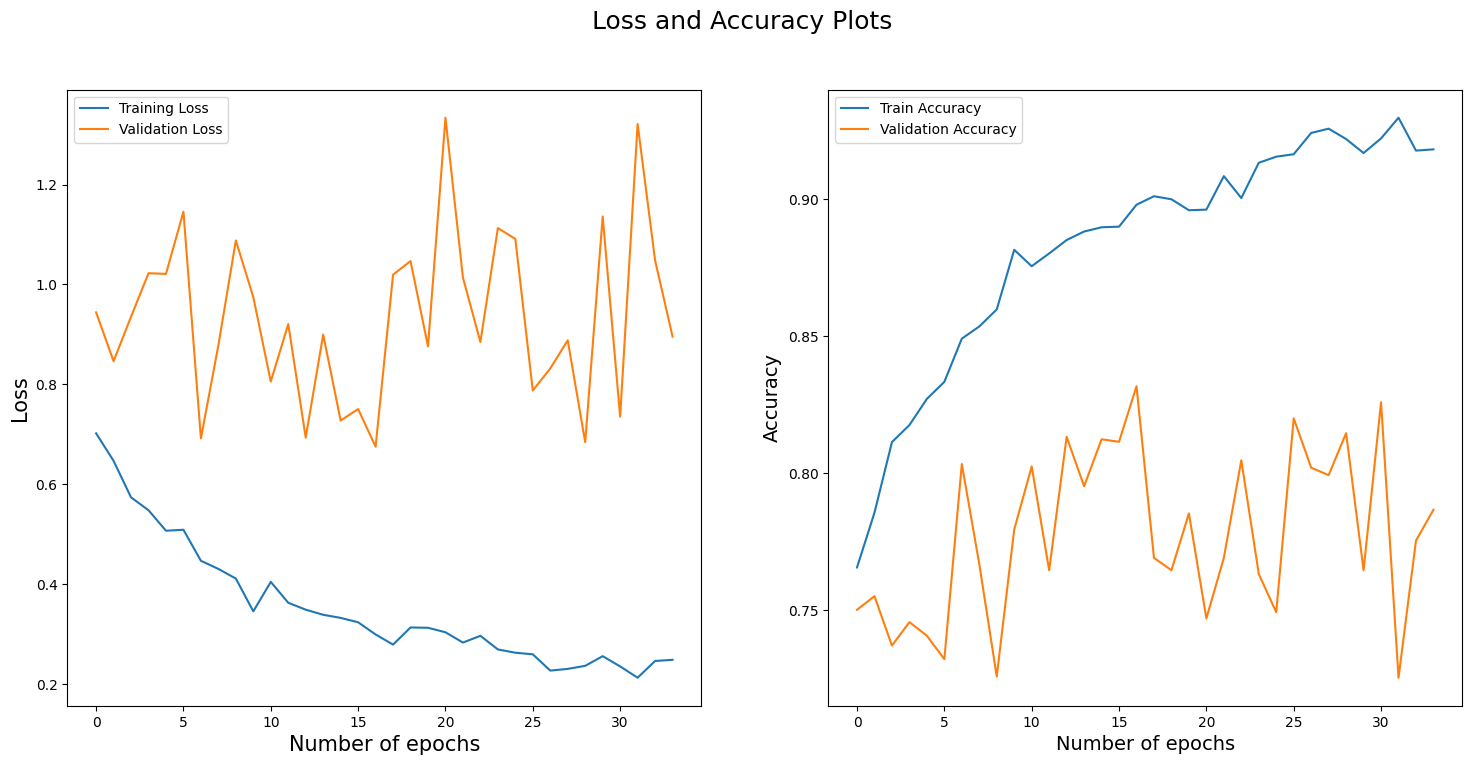

In [55]:
show_history(history)

## Saving the model

In [56]:
import subprocess
from IPython.display import FileLink, display

In [59]:
def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [60]:
download_file('/kaggle/working/', 'mushroms_9_efb0_2311_t211.h5')

Unable to run zip command!
/bin/sh: 1: zip: not found



In [61]:
model.save('mushroms_9_efb0_2311_t211.h5')

In [62]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpa8xhqi0q/assets


INFO:tensorflow:Assets written to: /tmp/tmpa8xhqi0q/assets


In [63]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

13482820